# Letter Recongnition

In this jupyter notebook we will try to train our machine learning model to predict a English Capital letter based on few features.

## Data Description

letter :  capital letter (26 values from A to Z) <br>
x-box :   horizontal position of box <br>
y-box :   vertical position of box <br>
width :   width of box <br>
high :    height of box <br>
onpix :   total # on pixels <br>
x-bar :   mean x of on pixels in box <br>
y-bar :   mean y of on pixels in box <br>
x2bar :   mean x variance <br>
y2bar :   mean y variance <br>
xybar :   mean x y correlation <br> 
x2ybr :   mean of x * x * y <br>
xy2br :   mean of x * y * y <br>
x-ege :   mean edge count left to right <br>
xegvy :   correlation of x-ege with y <br>
y-ege :   mean edge count bottom to top <br>
yegvx :   correlation of y-ege with x <br>

 # Import Data and Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.preprocessing import StandardScaler


# Importing Models
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
letter_data = pd.read_csv("LetterRecognition_train.csv")

In [3]:
letter_data.shape

(16000, 18)

- We have 16000 records with 18 features

# Data Preprosessing

In [4]:
letter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
letter    16000 non-null object
x-box     16000 non-null int64
y-box     16000 non-null int64
width     16000 non-null int64
high      16000 non-null int64
onpix     16000 non-null int64
x-bar     16000 non-null int64
y-bar     16000 non-null int64
x2bar     16000 non-null int64
y2bar     16000 non-null int64
xybar     16000 non-null int64
x2ybr     16000 non-null int64
xy2br     16000 non-null int64
x-ege     16000 non-null int64
xegvy     16000 non-null int64
y-ege     16000 non-null int64
yegvx     16000 non-null int64
id        16000 non-null int64
dtypes: int64(17), object(1)
memory usage: 2.2+ MB


In [5]:
letter_data.isna().sum()

letter    0
x-box     0
y-box     0
width     0
high      0
onpix     0
x-bar     0
y-bar     0
x2bar     0
y2bar     0
xybar     0
x2ybr     0
xy2br     0
x-ege     0
xegvy     0
y-ege     0
yegvx     0
id        0
dtype: int64

- There is no null values.

In [6]:
letter_data.letter.unique()

array(['I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F',
       'C', 'T', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

- We have all the alphabets in the data

In [7]:
sorted_list =  list(sorted(letter_data.letter.unique()))

In [8]:
keys_dict = {}
for idx,val in enumerate(sorted_list):
    keys_dict[val] = idx

In [9]:
keys_dict

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

- Mapping corresponding int value to alphabets

In [10]:
letter_data['letter'] = letter_data.letter.map(keys_dict)

In [11]:
letter_data.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,id
0,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,1
1,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,2
2,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,3
3,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,4
4,18,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7,5


In [12]:
letter_data.drop('id', axis=1, inplace=True)

# EDA

Lets look into distribution of our predicting class which is letter

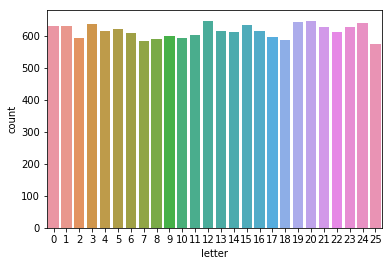

In [13]:
sns.countplot(x='letter', data=letter_data)

From this countplot we can see that count for all letters in datasets are approximatly similar. so we don't have imbalance dataset

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


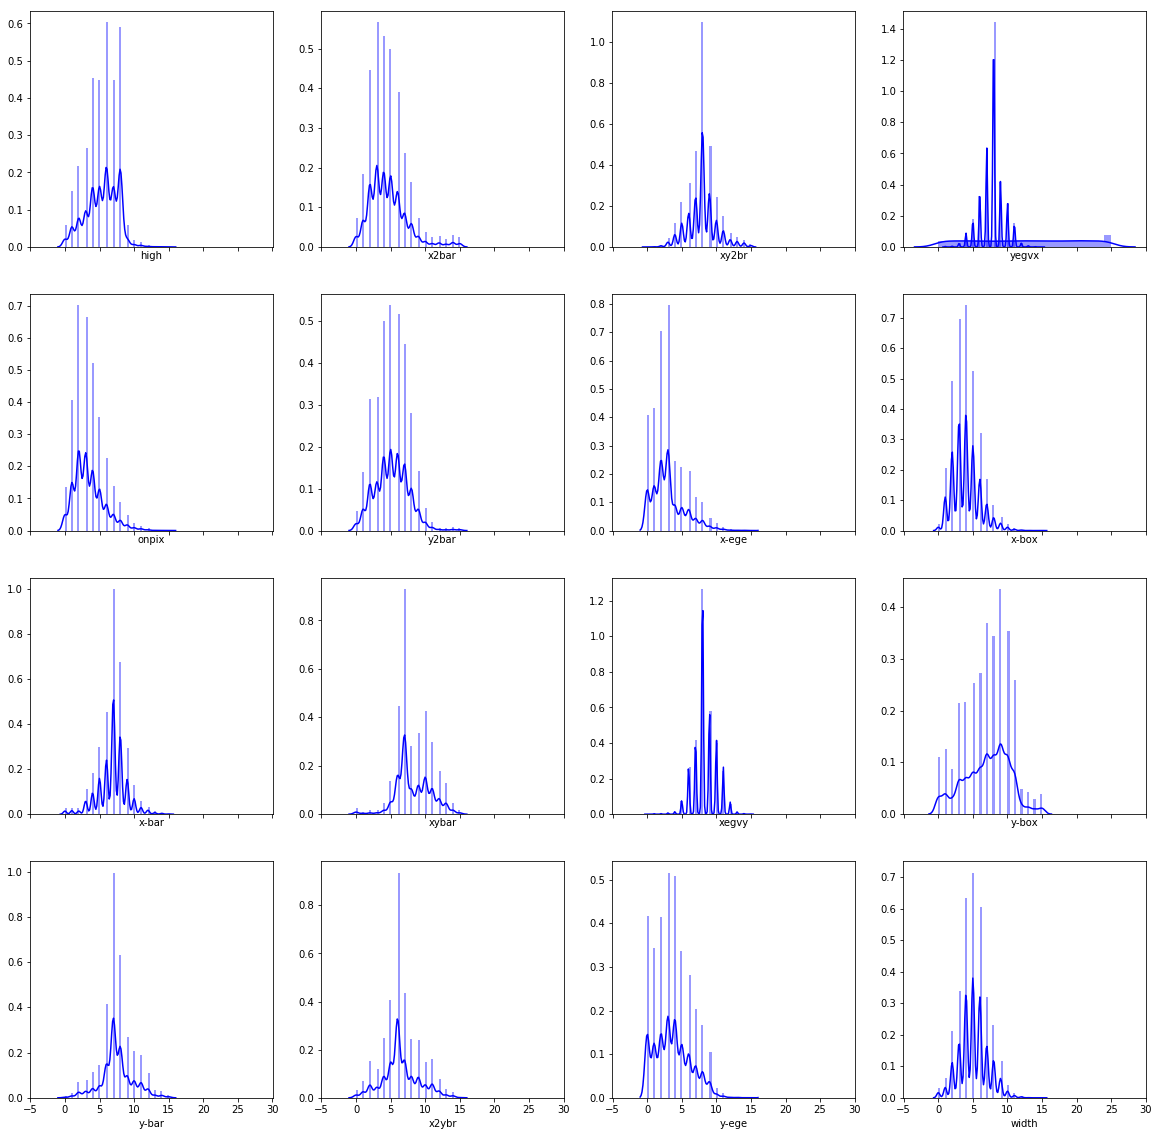

In [14]:
f, axes = plt.subplots(4, 4, figsize=(20, 20), sharex=True)
for i, feature in enumerate(letter_data.columns):
    sns.distplot(letter_data[feature] , color="blue", ax=axes[i%4, i//4 - 1])

- Distrubution of features 

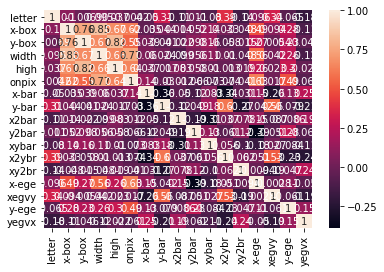

In [15]:
sns.heatmap(letter_data.corr(), annot=True)

- (y-box, high) and (x-box, width) pair looks highly correlated so we can drop one column from pair.

In [16]:
# Dropping high and width column
letter_data.drop(['high','width'], axis=1, inplace=True)

# Feature Engineering

## Feature Scaling

In [17]:
stdScaler = StandardScaler()

In [18]:
X = letter_data.drop('letter',axis= 1)

In [19]:
X = stdScaler.fit_transform(X)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
Target = ['letter']

## Baseline Model Selection

In [21]:
Target = ['letter']

# X = data1_x_bin
# y = Target
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

MLA = [
    #Ensemble Methods
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Nearest Neighbor
     neighbors.KNeighborsClassifier(),
 
   #SVM
    svm.SVC(probability=True),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7 ) # run model 10x with 60/30 split intentionally leaving out 10%
#random_state = 0 
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = letter_data[Target]  # Y 

#index through MLA and save performance to table
row_index = 0
Feature_Importance = {}

for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, X, letter_data[Target], cv  = cv_split,return_train_score=True,scoring=None)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(X, letter_data[Target])

    try:
      Feature_Importance[MLA_name] = alg.feature_importances_
    except AttributeError:
      pass
      
    MLA_predict[MLA_name] = alg.predict(X)
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
MLA_compare['Difference'] = (MLA_compare['MLA Test Accuracy Mean']-MLA_compare['MLA Train Accuracy Mean'])*100
MLA_compare.sort_values(by='Difference',ascending=False)

#MLA_predict


# To select the final baseline, run this block of code - without random state ~ 5 time and then pick the consistent Algo;

# as a first step, run the model pipeline and select the best model 
    # check the selected model, without random state atleast ~ 5 times; just to be sure, if it's behaving normally 

D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, war

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:60: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fi

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma exp

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time,Difference
5,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.951643,0.930771,0.0151194,19.7195,-2.0872
4,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.965125,0.935708,0.00767097,0.103323,-2.94167
6,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.911393,0.877104,0.0170006,18.8633,-3.42887
2,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.967143,0.910687,0.00761398,59.649,-5.64554
1,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.932167,0.0105297,0.21087,-6.78333
3,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.999143,0.921167,0.0133732,0.262222,-7.79762
0,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.998054,0.912937,0.0185562,0.726033,-8.51161


Here We can see the baseline model's training and testing accuracy. We will choose SVC and KNeighborsClassifier classifier as they have good Test Accuracy mean with less difference with train accuracy (Less overfitting).
Now we will also go with ExtraTreesClassifier, RandomForestClassifier and BaggingClassfier to see if we can improve overfitting issue with these models using Hyperparameter tuning.

## Running the Model using GridSearchCV

In [22]:
# Helper Class for Initilizing GridSearch

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}
        self.best_params = {}
        self.feature_importance = {}
        self.FeatureImportanceAlgo = ['DecisionTreeClassifier','RandomForestClassifier','ExtraTreesClassifier','GradientBoostingClassifier']

    def fit(self, X, y, cv=5, n_jobs=-1, verbose=1, scoring='f1', refit=True):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs  
            self.best_params[key]  = str(gs.best_params_)
            if key in self.FeatureImportanceAlgo:
              self.feature_importance[key]= gs.best_estimator_.feature_importances_

            # print (gs.best_params_.feature_importances_ )
            # try:
            #   print(gs.best_params_.feature_importances_ )
            #   self.feature_importance[key]= gs.best_params_.feature_importances_ 
            # except AttributeError:
            #   pass

    def returnBestParamDF(self):
      d = self.best_params
      BestParamDF = pd.DataFrame.from_dict([d.keys(), d.values()]).T
      return BestParamDF

    # def Feature_Importance(self):
    #   for each

    # def returnFeatureImportance(self):


    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

models1 = {
    
#     the way to choose these models - can be selected from your previous baseline method;
#     another way could be that - you choose the models; 
    
    'SVC':SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
}

params1 = {
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ],
    'KNeighborsClassifier':{ 'n_neighbors': [5,10,15,20], 'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']},
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'BaggingClassifier': {'n_estimators': [16, 32]}
    
    
}

In [29]:
helper1 = EstimatorSelectionHelper(models1 ,params1)
helper1.fit(X, letter_data[Target], scoring='accuracy', n_jobs=-1)

Running GridSearchCV for SVC.
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.7min finished
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running GridSearchCV for KNeighborsClassifier.
Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  3.5min finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Running GridSearchCV for GradientBoostingClassifier.
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  5.6min finished
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.1s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.7s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.5s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Running GridSearchCV for BaggingClassifier.
Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    4.3s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.3s finished
D:\Anaconda\lib\site-packages\sklearn\ensemble\bagging.py:621: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
helper1.score_summary(sort_by='mean_score')

As we can clearly see that Random forest and Extra tree Classfier are giving us good test accuracy so we will further do parameter optimiztion with these two Classifiers.

In [26]:
models2 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier()
}

params2 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32,64,128] ,  'max_features' : ['sqrt', 'auto', 'log2'] },
    'RandomForestClassifier': { 'n_estimators': [16, 32, 64,128], 'max_features' : ['sqrt', 'auto', 'log2']  }
}

In [27]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X, letter_data[Target], scoring='accuracy', n_jobs=-1)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   35.1s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   29.9s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [30]:
helper2.score_summary(sort_by='mean_score')

ExtraTreesClassifier
RandomForestClassifier


,estimator,min_score,mean_score,max_score,std_score,max_features,n_estimators
11,ExtraTreesClassifier,0.96243,0.967185,0.971028,0.00287485,log2,128
7,ExtraTreesClassifier,0.958673,0.966811,0.971142,0.00426012,auto,128
3,ExtraTreesClassifier,0.958359,0.966372,0.97134,0.004561,sqrt,128
2,ExtraTreesClassifier,0.957733,0.963747,0.966667,0.00310347,sqrt,64
6,ExtraTreesClassifier,0.958359,0.963682,0.970405,0.00438234,auto,64
10,ExtraTreesClassifier,0.958359,0.963435,0.966313,0.00287741,log2,64
1,ExtraTreesClassifier,0.955229,0.960002,0.965182,0.00372978,sqrt,32
5,ExtraTreesClassifier,0.954289,0.959751,0.965182,0.00371576,auto,32
9,ExtraTreesClassifier,0.955855,0.959562,0.962045,0.00203653,log2,32
23,RandomForestClassifier,0.95335,0.959247,0.962617,0.00319793,log2,128


In [31]:
print(helper2.grid_searches['ExtraTreesClassifier'].best_params_)
print(helper2.grid_searches['ExtraTreesClassifier'].best_score_)


{'max_features': 'log2', 'n_estimators': 128}
0.9671875


- By using GridSearchCV and hyperparamter tuning we achieved accuray around __97%__.

In [32]:
feature_imp = helper2.grid_searches['ExtraTreesClassifier'].best_estimator_.feature_importances_

In [33]:
df_fi = pd.Series(data=feature_imp, index=letter_data.drop("letter", axis=1).columns)

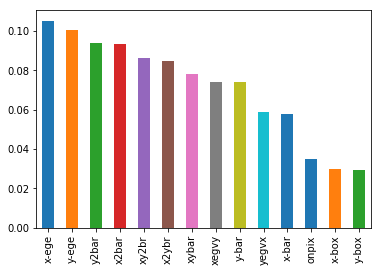

In [34]:
df_fi.sort_values(ascending=False).plot(kind='bar')

In [35]:
top10_features = df_fi.sort_values(ascending=False).head(10).index.values

In [36]:
X_top_10_feature = letter_data[top10_features]

In [37]:
X_top_10_feature = stdScaler.fit_transform(X_top_10_feature)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
helper3 = EstimatorSelectionHelper(models2, params2)
helper3.fit(X_top_10_feature, letter_data[Target], scoring='accuracy', n_jobs=-1)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   33.6s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Running GridSearchCV for RandomForestClassifier.
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   28.8s finished
D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [39]:
helper3.score_summary(sort_by='mean_score')

ExtraTreesClassifier
RandomForestClassifier


,estimator,min_score,mean_score,max_score,std_score,max_features,n_estimators
3,ExtraTreesClassifier,0.953037,0.960494,0.965689,0.00472648,sqrt,128
7,ExtraTreesClassifier,0.953976,0.960311,0.964555,0.00415132,auto,128
11,ExtraTreesClassifier,0.952098,0.960121,0.964754,0.00426955,log2,128
6,ExtraTreesClassifier,0.949593,0.958995,0.963818,0.00564444,auto,64
2,ExtraTreesClassifier,0.952098,0.958936,0.965109,0.00507465,sqrt,64
10,ExtraTreesClassifier,0.948967,0.956745,0.960436,0.00435925,log2,64
9,ExtraTreesClassifier,0.946149,0.954306,0.961994,0.00526438,log2,32
5,ExtraTreesClassifier,0.947401,0.953371,0.95919,0.00390443,auto,32
15,RandomForestClassifier,0.945836,0.953248,0.957026,0.00390321,sqrt,128
19,RandomForestClassifier,0.947401,0.953247,0.957268,0.00344019,auto,128


- Here we can see that choosing only top 10 features result in decrease in model accuray so we will go with all features for final model selection.

# Conclusion

- By using ensemble model ExtraTreeClassifier we achieved around __97%__ of accuracy to predict a letter.
- Feature engineering helped us to remove correlated features which helped us to improve accuracy around __1%__.
- Scaled feature to Standard Normal distribution which helped us in increment of accuracy.